# Roller Coaster
## Project Author: Carlos Paiva

## Introduction
Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

## Task 1

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# Initial setup and data loading:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

print(wood.head())
print('')
print('')
print(steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam

## Task 2

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

In [2]:
# Defining the function:
def rank_plot(name, park_name, df):
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    short_df = df[(df.Name == name) & (df.Park == park_name)]
    y_values = short_df.Rank
    x_values = short_df['Year of Rank']
    plt.plot(x_values, y_values, color='crimson', linewidth=2.5)
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Roller coaster ranking over time')
    legend_label = [name]
    plt.legend(legend_label)
    plt.show()

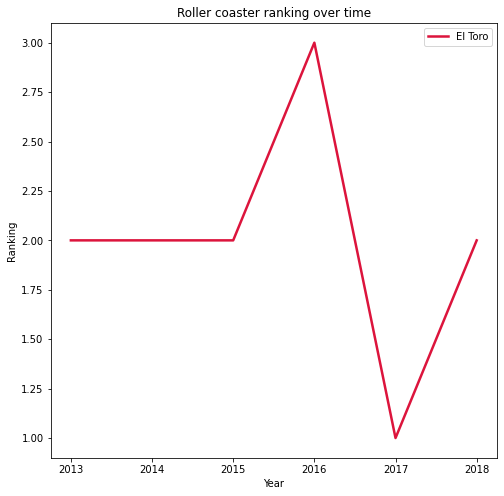

In [3]:
# Testing the function:
rank_plot('El Toro', 'Six Flags Great Adventure', wood)

## Task 3

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

In [4]:
# Defining the function:
def rank_plot_2(name1, name2, park_name1, park_name2, df):
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    short_df1 = df[(df.Name == name1) & (df.Park == park_name1)]
    y_values1 = short_df1.Rank
    short_df2 = df[(df.Name == name2) & (df.Park == park_name2)]
    y_values2 = short_df2.Rank
    x_values1 = short_df1['Year of Rank']
    x_values2 = short_df2['Year of Rank']
    plt.plot(x_values1, y_values1, color='dodgerblue', linewidth=2.5)
    plt.plot(x_values2, y_values2, color='black', linewidth=2.5)
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Comparison of roller coaster rankings over time')
    legend_label = [name1, name2]
    plt.legend(legend_label)
    plt.show()

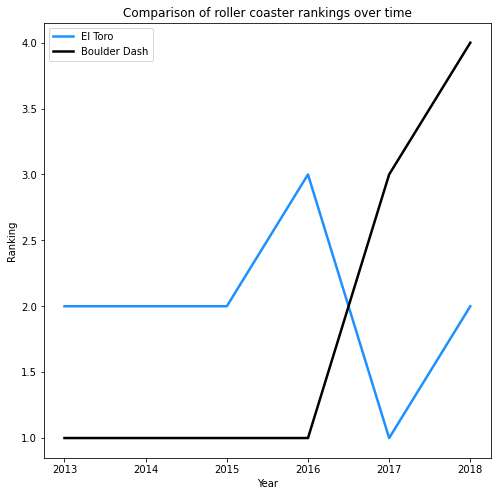

In [5]:
# Testing the function:
rank_plot_2('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', wood)

## Task 4

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

Call your function with a value for n and either the wood ranking or steel ranking DataFrame.

In [6]:
# Defining the function:
def rank_plot_3(n, df):
    short_df = df[df['Rank'] <= n]
    fig, ax = plt.subplots(figsize=(8,8))
    for coaster in set(short_df['Name']):
        y_values = short_df[short_df['Name'] == coaster]
        ax.plot(y_values['Year of Rank'], y_values['Rank'], label=coaster)
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    plt.title("Top Roller Coasters Comparison")
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc=4)
    plt.show()

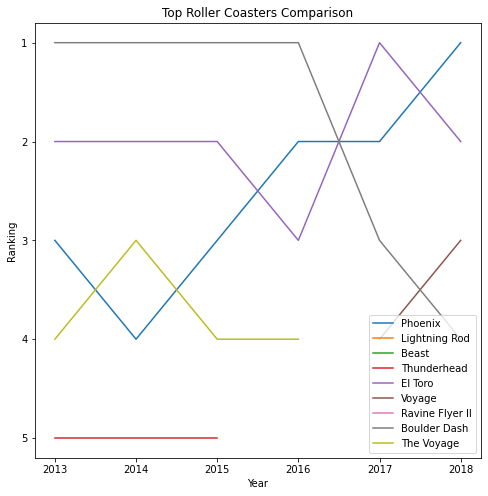

In [7]:
# Testing the function:
rank_plot_3(5,wood)

## Task 5

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [8]:
# New data loading:
cap_coaster = pd.read_csv('roller_coasters.csv')
print(cap_coaster.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


## Task 6

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

In [9]:
# Defining the function:
def hist_plot(df, column_name):
    if column_name == 'height':
        plt.figure(figsize=(8,8))
        ax = plt.subplot()
        heights = df[df[column_name] <= 140]
        dataset = heights['height'].dropna()
        plt.hist(dataset, bins = 20, color='chocolate', alpha=0.8)
    else:
        plt.figure(figsize=(8,8))
        ax = plt.subplot()
        dataset = df[column_name].dropna()
        plt.hist(dataset, bins = 20, color='chocolate', alpha=0.8)
    plt.title(column_name.title() + ' Histogram')
    plt.xlabel(column_name.title())
    plt.ylabel('Frequency')
    plt.show()

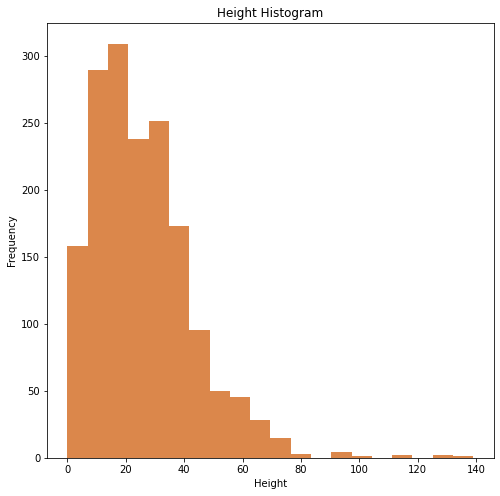

In [10]:
# Testing the function:
hist_plot(cap_coaster, 'height')

## Task 7

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

In [11]:
# Defining the function:
def bar_plot(df, park_name):
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    short_df = df[df.park == park_name]
    short_df = short_df.sort_values('num_inversions', ascending=False)
    park_inversions = short_df.num_inversions
    coaster_names = short_df.name
    plt.bar(range(len(park_inversions)), park_inversions, color='midnightblue')
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation = 90)
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    plt.title('Inversions per Roller Coaster')
    legend_label = [park_name]
    plt.legend(legend_label)
    plt.show()

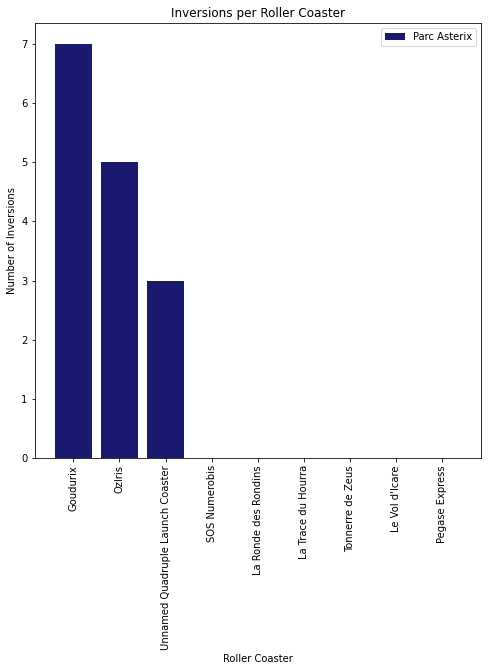

In [12]:
# Testing the function:
bar_plot(cap_coaster, 'Parc Asterix')

## Task 8

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

In [13]:
# Defining the function:
def pie_plot(df):
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    operating = df[df.status == 'status.operating']
    closed_definitely = df[df.status == 'status.closed.definitely']
    operating_number = len(operating)
    closed_definitely_number = len(closed_definitely)
    pie_figures = [operating_number, closed_definitely_number]
    pie_labels = ['Operating', 'Closed definitely']
    colors = ['turquoise', 'royalblue']
    plt.pie(pie_figures, labels=pie_labels, colors=colors, autopct="%1d%%")
    plt.title('Operating vs Def. Closed Roller Coasters')
    plt.show()

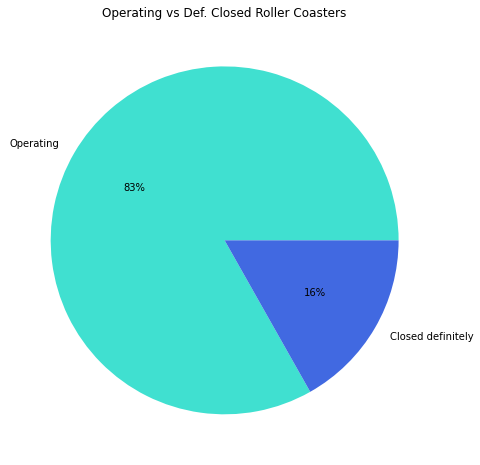

In [14]:
pie_plot(cap_coaster)

## Task 9

.scatter() is another useful function in matplotlib that you might not have seen before. .scatter() produces a scatter plot, which is similar to .plot() in that it plots points on a figure. .scatter(), however, does not connect the points with a line. This allows you to analyze the relationship between to variables.

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

In [15]:
# Defining the function:
def scatter_plot(df, column1, column2):
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    if column2 == 'height':
        sub_df = df[df.height < 140]
        x_values = sub_df[column1]
        y_values = sub_df[column2]
    else:
        x_values = df[column1]
        y_values = df[column2]
    plt.scatter(x_values, y_values, marker='*', color='forestgreen')
    plt.title(column1.title() + ' vs ' + column2.title())
    plt.xlabel(column1.title())
    plt.ylabel(column2.title())
    plt.show()

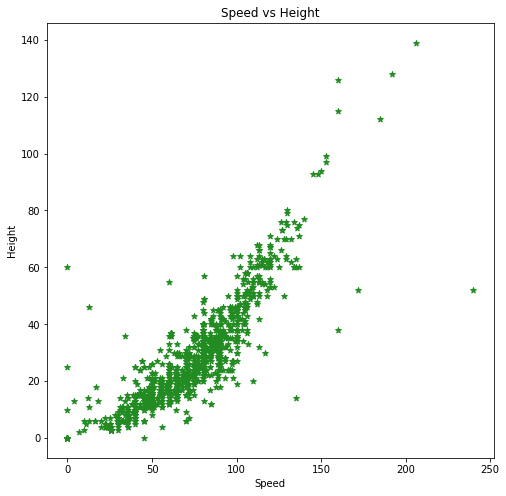

In [16]:
scatter_plot(cap_coaster, 'speed', 'height')

## Task 10

Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

Some questions you might want to answer with the datasets provided include:

1. What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
2. Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)
3. Do amusement parks have any specialties?

What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

### Additional question 1.1

     seating_type  name
8        Sit Down  2214
9        Spinning   150
5        Inverted   122
11      Suspended    55
1          Alpine    43
14             na    40
12  Water Coaster    29
3       Floorless    27
4          Flying    27
6       Motorbike    21
10       Stand Up    20
0   4th Dimension    18
13           Wing    17
2       Bobsleigh    11
7        Pipeline     5


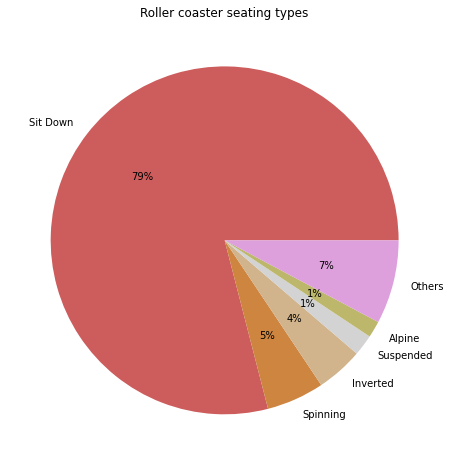

In [17]:
# What roller coaster seating type is most popular? We will use a pie chart for this:
plt.figure(figsize=(8,8))
ax = plt.subplot()
seating = cap_coaster.groupby('seating_type').name.count().reset_index()
seating = seating.sort_values('name', ascending=False)
seating_count = [2214, 150, 122, 55, 43, len(cap_coaster)-2214-150-122-55-43]
seating_labels = ['Sit Down', 'Spinning', 'Inverted', 'Suspended', 'Alpine', 'Others']
colors = ['indianred', 'peru', 'tan', 'lightgray', 'darkkhaki', 'plum']
plt.pie(seating_count, labels=seating_labels, colors=colors, autopct="%1d%%")
plt.title('Roller coaster seating types')
print(seating)
plt.show()

# Answer: 'Sit Down'

In [18]:
# Do different seating types result in higher/faster/longer roller coasters? We will use boxplots for this:
seating_speed = cap_coaster.groupby('seating_type').speed.mean().reset_index()
seating_height = cap_coaster.groupby('seating_type').height.mean().reset_index()
seating_length = cap_coaster.groupby('seating_type').length.mean().reset_index()
print(seating_speed, seating_height, seating_length)

     seating_type      speed
0   4th Dimension  67.352941
1          Alpine  38.333333
2       Bobsleigh  54.111111
3       Floorless  98.208333
4          Flying  70.125000
5        Inverted  80.054545
6       Motorbike  71.400000
7        Pipeline  70.666667
8        Sit Down  69.758865
9        Spinning  50.060606
10       Stand Up  86.000000
11      Suspended  53.966667
12  Water Coaster  76.050000
13           Wing  95.166667
14             na        NaN      seating_type     height
0   4th Dimension  38.555556
1          Alpine  25.000000
2       Bobsleigh  21.000000
3       Floorless  45.538462
4          Flying  29.720000
5        Inverted  33.178571
6       Motorbike  16.583333
7        Pipeline  30.750000
8        Sit Down  26.264180
9        Spinning  14.939759
10       Stand Up  34.150000
11      Suspended  20.344828
12  Water Coaster  30.347826
13           Wing  41.714286
14             na  19.000000      seating_type      length
0   4th Dimension  382.562500
1          A

### Additional question 1.2

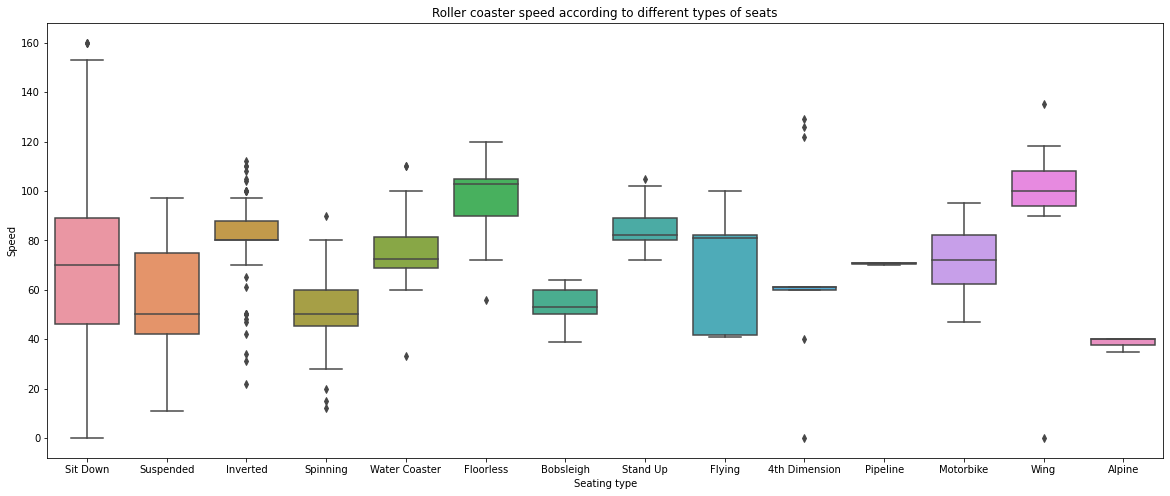

<Figure size 432x288 with 0 Axes>

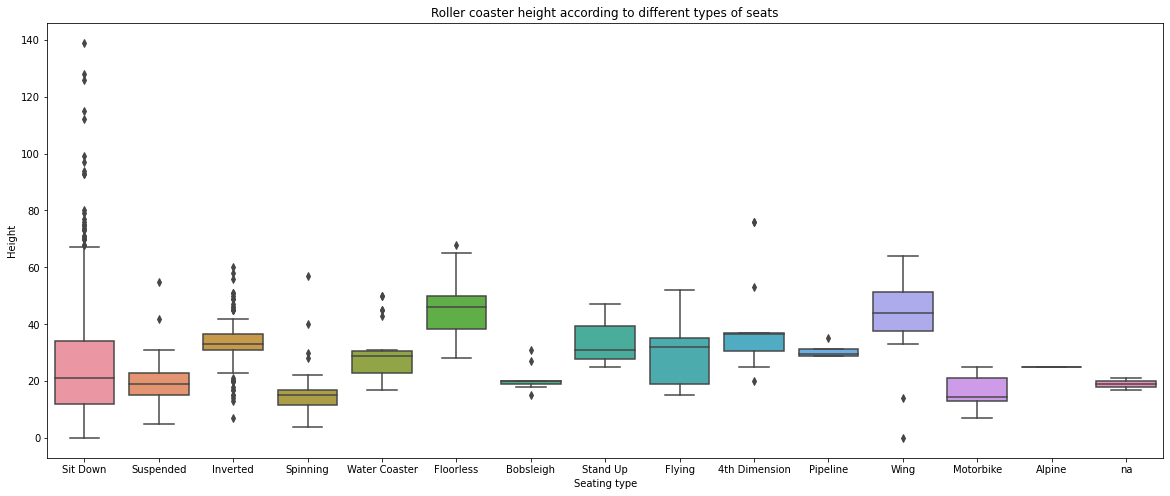

<Figure size 432x288 with 0 Axes>

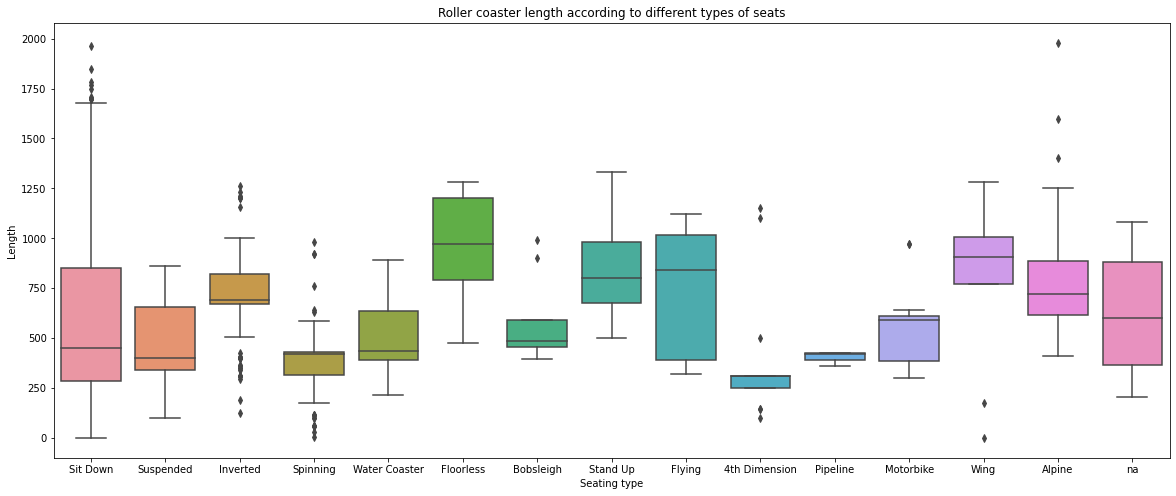

In [19]:
plt.figure(figsize=(20,8))
ax = plt.subplot()
sns.boxplot(data=cap_coaster[cap_coaster.speed < 170], x='seating_type', y='speed')
plt.xlabel('Seating type')
plt.ylabel('Speed')
plt.title('Roller coaster speed according to different types of seats')
plt.show()

# Answer: on average, the 'Floorless' roller coaster is the fastest, yet the 'Sit Down' roller coaster can achieve the highest speed

plt.clf()
plt.figure(figsize=(20,8))
ax1 = plt.subplot()
sns.boxplot(data=cap_coaster[cap_coaster.height < 200], x='seating_type', y='height')
plt.xlabel('Seating type')
plt.ylabel('Height')
plt.title('Roller coaster height according to different types of seats')
plt.show()

# Answer: on average, the 'Floorless' roller coaster is the tallest as well, yet the 'Sit Down' roller coaster can be taller

plt.clf()
plt.figure(figsize=(20,8))
ax1 = plt.subplot()
sns.boxplot(data=cap_coaster[cap_coaster.length < 2000], x='seating_type', y='length')
plt.xlabel('Seating type')
plt.ylabel('Length')
plt.title('Roller coaster length according to different types of seats')
plt.show()

# Answer: on average, the 'Floorless' roller coaster is the longest as well, yet the 'Sit Down' roller coaster can be longer
# There seems to be some correlation between speed, height and length

### Additional question 2

In [53]:
# Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)
# We will use a histogram to compare the normalizad distributions of the aggregate of all manufacturers vs one in particular for a specific metric

# Defining the function:
def manuf_spec_comp(df, metric, manufact):
    if metric == 'height':
        plt.figure(figsize=(10,10))
        ax = plt.subplot()
        df = df[df.height < 140]
        full_data_metric = df[metric].dropna()
        manuf_dataset = df[df.manufacturer == manufact]
        manuf_dataset = manuf_dataset[manuf_dataset.height < 140]
        manuf_data_metric = manuf_dataset[metric].dropna()
        plt.hist(full_data_metric, bins=20, density=True, color='blue', alpha=0.5)
        plt.hist(manuf_data_metric, bins=10, density=True, color='red', alpha=0.5)   
    else:
        plt.figure(figsize=(10,10))
        ax = plt.subplot()
        full_data_metric = df[metric].dropna()
        manuf_dataset = df[df.manufacturer == manufact]
        manuf_data_metric = manuf_dataset[metric].dropna()
        plt.hist(full_data_metric, bins=20, density=True, color='blue', alpha=0.5)
        plt.hist(manuf_data_metric, bins=10, density=True, color='red', alpha=0.5)
    plt.title('Comparison of ' + metric + ' focus for ' + manufact + ' vs all manufacturers')
    legend_label = ['All manufacturers', manufact]
    plt.legend(legend_label)
    plt.xlabel(metric.title())
    plt.ylabel('Frequency')
    plt.show()

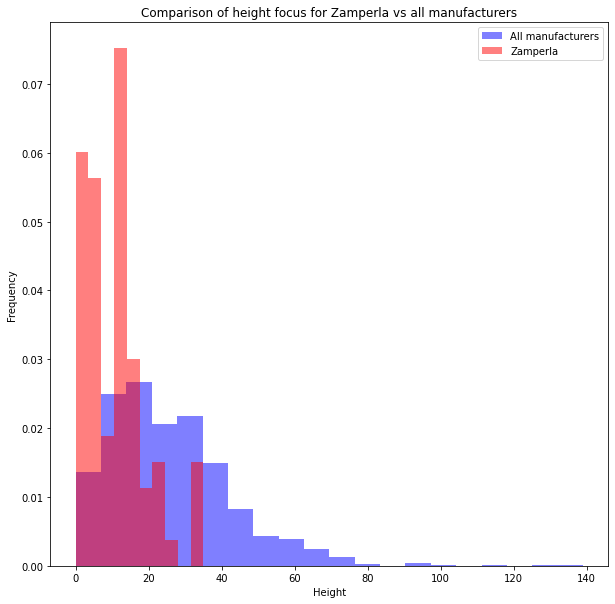

In [54]:
# Testing the function:
manuf_spec_comp(cap_coaster, 'height', 'Zamperla')

# Comment: From the comparison of the normalized distributions for a particular manufacturer (red) compared with the average (blue), the focus of that manufacturer for more or less 'speed', 'height' or 'lenght' can be inferred

### Additional question 3

In [66]:
# Do amusement parks have any specialties?

# This question follows a smiliar approach to the previous one

def park_spec_comp(df, metric, amus_park):
    if metric == 'height':
        plt.figure(figsize=(10,10))
        ax = plt.subplot()
        df = df[df.height < 140]
        full_data_metric = df[metric].dropna()
        park_dataset = df[df.park == amus_park]
        park_dataset = park_dataset[park_dataset.height < 140]
        park_data_metric = park_dataset[metric].dropna()
        plt.hist(full_data_metric, bins=20, density=True, color='lightsalmon', alpha=0.5)
        plt.hist(park_data_metric, bins=10, density=True, color='lightseagreen', alpha=0.5)   
    else:
        plt.figure(figsize=(10,10))
        ax = plt.subplot()
        full_data_metric = df[metric].dropna()
        park_dataset = df[df.park == amus_park]
        park_data_metric = park_dataset[metric].dropna()
        plt.hist(full_data_metric, bins=20, density=True, color='lightsalmon', alpha=0.5)
        plt.hist(park_data_metric, bins=10, density=True, color='lightseagreen', alpha=0.5)
    plt.title('Comparison of ' + metric + ' focus for ' + amus_park + ' vs all parks')
    legend_label = ['All parks', amus_park]
    plt.legend(legend_label)
    plt.xlabel(metric.title())
    plt.ylabel('Frequency')
    plt.show()

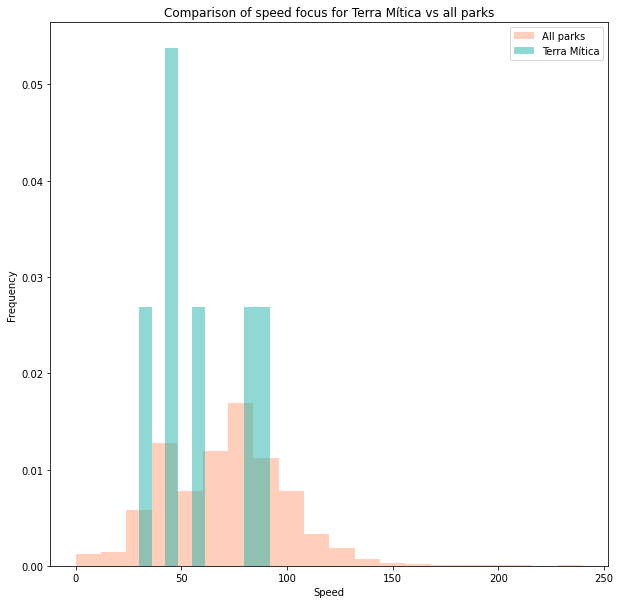

In [68]:
# Testing the function:
park_spec_comp(cap_coaster, 'speed', 'Terra Mítica')

# Comment: From the comparison of the normalized distributions for a particular park (light salmon) compared with the average (light sea green), the focus of that manufacturer for more or less 'speed', 'height' or 'lenght' can be inferred